In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from matplotlib.ticker import LinearLocator
import matplotlib.dates as mdates

In [3]:
place = 'Taoyuan'
path = f'../DataBase/Temperature/{place}'

In [4]:
read_col = ['Time', 'Temp', 'Light']

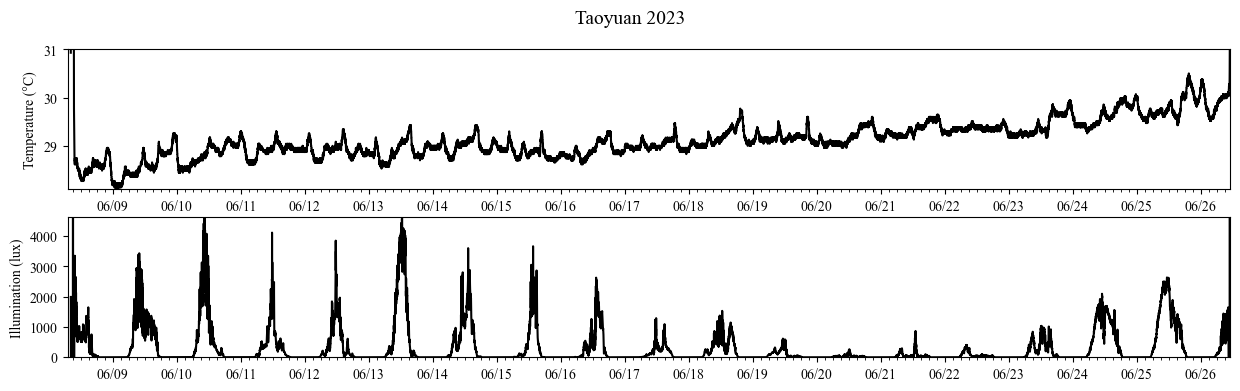

In [10]:
for filepath in sorted(glob.glob(f'{path}/*xlsx'))[4:5]:
    filename = filepath.rsplit('/')[-1]
    year = 2022 if filename[:2] == '22' else 2023
    

    df = pd.read_excel(filepath, header=None, names=read_col, skiprows=1) 
    begintime = pd.to_datetime(str(df['Time'].values[0]))
    endtime   = pd.to_datetime(str(df['Time'].values[-1]))
    
    
    plt.rcParams["font.family"] = "Times New Roman"
    fig, ax = plt.subplots(2,1, figsize=(15,4))
    
    ax[0].plot(df['Time'], df['Temp'], 'k')
    ax[0].set_xlim(datetime(begintime.year,begintime.month,begintime.day,begintime.hour-1,0), datetime(endtime.year,endtime.month,endtime.day,endtime.hour+1))
    ax[0].set_ylim(min(df['Temp']), 31)#np.mean(df['Temp'])+6)
    ax[0].set_ylabel('Temperature (°C)', fontsize=10)
    ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
    ax[0].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes
    

    ax[1].plot(df['Time'], df['Light'], 'k')
    ax[1].set_xlim(datetime(begintime.year,begintime.month,begintime.day,begintime.hour-1,0), datetime(endtime.year,endtime.month,endtime.day,endtime.hour+1))  
    ax[1].set_ylim(0, np.mean(df['Light'])*15) # 27 
    ax[1].set_ylabel('Illumination (lux)', fontsize=10)
    ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
    ax[1].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes  
    
    plt.suptitle(f'{place} {year}', fontsize=14)
    plt.savefig(f'../Results/hobo/{place}_hobo_{filename.rsplit(".")[0]}.png', dpi=150)
    plt.savefig(f'../Results/hobo/{place}_hobo_{filename.rsplit(".")[0]}.pdf', dpi=150)